In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [23]:
!pip install grakel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.3 MB/s eta 0:00:00


In [22]:
# https://github.com/siantist/graph_mining/tree/main/grakel/preprocessing
def prepare_grakel_input(node_attributes_array, edge_attributes_array, num_graphs): # array of vectors
  from grakel import Graph
  grakel_graphs = []

  for i in range(num_graphs):
      node_attributes = node_attributes_array[i]
      edge_attributes = edge_attributes_array[i]
      ggraph = Graph(edges, node_labels= node_attributes, edge_labels = edge_attributes)
      grakel_graphs.append(ggraph)

  return grakel_graphs

def run_kernel(self, g1, g2):
        from grakel.kernels import PropagationAttr
        pak = PropagationAttr(normalize=True, verbose=False)
        pak.fit_transform([g1])
        sc = pak.transform([g2])

        return sc
# load the dataset
g_db2 = tud_to_networkx("ENZYMES")

graphs =[]
classes = []
adj_mats = {}

grakel_graphs = {}
grakel_array = []

grakel_array2 = []

# edge lists
edgelists = {}

i=0
for g in g_db2:
    # convert to adj mat or other graph object
    A = nx.to_numpy_matrix(g)
    # make the edge list from it?
    elist = edge_dictionary(g)
    edgelists[i] = elist
    G = Graph(elist)

    grakel_graphs[i] = G
    grakel_array.append(G)

    adj_mats[i] = A

    c = g.graph['classes']
    classes.append(c)

    node_lab = g.n_labels #g_db2[0].nodes[1]['labels']
    # make the grakel graph
    G2 = Graph(elist, node_lab)

    grakel_array2.append(G2)

    i+=1



NameError: ignored

In [ ]:
# streamline the above to prepare all the graph node embeddings

from node2vec import Node2Vec# Generate walks
for in in range(len(grakel_array)):
  g = grakel_array[ind]
  data = dataset[ind]
  node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100)# Reformat position nodes

  model = node2vec.fit(window=10, min_count=1, batch_words=4)
  node_embeddings = (model.wv.vectors)
  # measure # rows of data.x
  nrows = np.shape(data.x)[0]
  data.y = torch.as_tensor([int(data.y)]*nrows)

In [ ]:
# https://ysig.github.io/GraKeL/0.1a8/documentation/introduction.html#performing-graph-classification
from sklearn.svm import SVC
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
SVC(kernel='precomputed')

y_pred = clf.predict(K_test)
from sklearn.metrics import accuracy_score
print("%2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Processing...



Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Done!


In [4]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root="tutorial1",name= "ENZYMES")
data = dataset[0]

Extracting tutorial1/ENZYMES/ENZYMES.zip
Processing...
Done!


In [25]:
data = dataset[1]

In [28]:
np.shape(data.x)[0] # dimension that muust reshape y by

23

In [5]:
# iterate over edges (edge_index) to add/convert to adjacency matrix
from torch_geometric.utils import to_dense_adj
# https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/utils/to_dense_adj.html
a = to_dense_adj(data.edge_index)

In [7]:
import numpy as np
an = np.array(a[0])
anp = an.astype(np.float)

<ipython-input-7-7eb8679444a7>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  anp = an.astype(np.float)


In [8]:
import networkx as nx

import numpy as np
G=nx.from_numpy_array(anp)
# calculate eccentricity
#ecc = nx.eccentricity(G)

from node2vec import Node2Vec# Generate walks
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=100)# Reformat position nodes

model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 237.66it/s]


In [9]:
node_embeddings = (model.wv.vectors)

In [10]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GATCN(torch.nn.Module):
  def __init__(self, hidden_channels):
    super().__init__()
    torch.manual_seed(123)
    self.conv1 =  GATConv(dataset.num_features, hidden_channels, return_attention_weights=True)
    self.conv2 = GATConv(hidden_channels, dataset.num_classes)
  def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

gatmodel = GATCN(hidden_channels=16)
print(gatmodel)

GATCN(
  (conv1): GATConv(3, 16, heads=1)
  (conv2): GATConv(16, 6, heads=1)
)


In [ ]:
# train the above model
model = gatmodel
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out_ne = model.forward(data.x, data.edge_index) #, return_attention_weights=True)  # Perform a single forward pass.
      loss = criterion(out_ne, data.y)
      #loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, out_ne

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss, out_ne = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9449
Epoch: 002, Loss: 1.9275
Epoch: 003, Loss: 1.9089
Epoch: 004, Loss: 1.8880
Epoch: 005, Loss: 1.8723
Epoch: 006, Loss: 1.8511
Epoch: 007, Loss: 1.8303
Epoch: 008, Loss: 1.8197
Epoch: 009, Loss: 1.8007
Epoch: 010, Loss: 1.7863
Epoch: 011, Loss: 1.7681
Epoch: 012, Loss: 1.7513
Epoch: 013, Loss: 1.7552
Epoch: 014, Loss: 1.7317
Epoch: 015, Loss: 1.7262
Epoch: 016, Loss: 1.7055
Epoch: 017, Loss: 1.7005
Epoch: 018, Loss: 1.6928
Epoch: 019, Loss: 1.6752
Epoch: 020, Loss: 1.6580
Epoch: 021, Loss: 1.6517
Epoch: 022, Loss: 1.6424
Epoch: 023, Loss: 1.6339
Epoch: 024, Loss: 1.6155
Epoch: 025, Loss: 1.6040
Epoch: 026, Loss: 1.5926
Epoch: 027, Loss: 1.5814
Epoch: 028, Loss: 1.5613
Epoch: 029, Loss: 1.5506
Epoch: 030, Loss: 1.5360
Epoch: 031, Loss: 1.5205
Epoch: 032, Loss: 1.5073
Epoch: 033, Loss: 1.5025
Epoch: 034, Loss: 1.4832
Epoch: 035, Loss: 1.4732
Epoch: 036, Loss: 1.4494
Epoch: 037, Loss: 1.4360
Epoch: 038, Loss: 1.4219
Epoch: 039, Loss: 1.4015
Epoch: 040, Loss: 1.3884


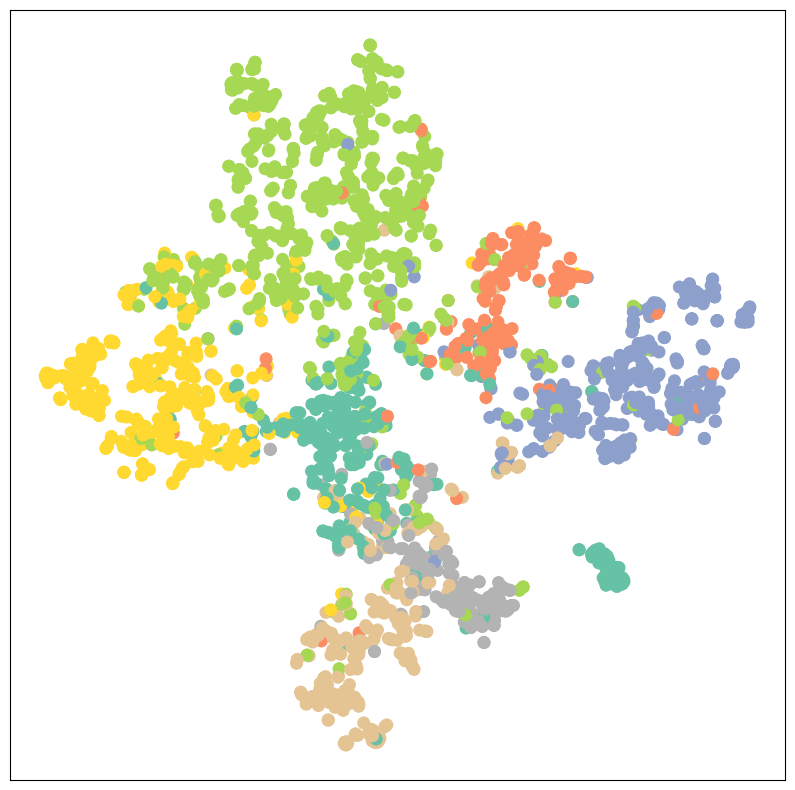

In [ ]:
visualize(out_ne, color=data.y)

In [ ]:
# try same on different dataset
from torch_geometric.datasets import TUDataset
tdataset = TUDataset(root="tutorial1",name= "ENZYMES")

Extracting tutorial1/ENZYMES/ENZYMES.zip
Processing...
Done!


In [ ]:
data = dataset[0] # tdataset

In [ ]:
data

Data(edge_index=[2, 102], x=[23, 3], y=[1])

In [ ]:
np.shape(data.edge_index)

torch.Size([2, 102])

In [ ]:
np.shape(data.x)

torch.Size([23, 3])

In [ ]:
model = gatmodel

In [ ]:
print(model)

GATCN(
  (conv1): GATConv(1433, 16, heads=1)
  (conv2): GATConv(16, 7, heads=1)
)


In [ ]:
print(model)

GATCN(
  (conv1): GATConv(3, 16, heads=1)
  (conv2): GATConv(16, 6, heads=1)
)


In [ ]:
torch.as_tensor([3])

tensor([3])

In [14]:
data.y = torch.as_tensor([int(data.y)]*37)

In [ ]:
# train the above model
model = gatmodel
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out_ne = model.forward(data.x, data.edge_index) #, return_attention_weights=True)  # Perform a single forward pass.
      print("outne shape,", np.shape(out_ne))
      print("data y shape,", np.shape(data.y))
      loss = criterion(out_ne, data.y)
      #loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, out_ne

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss, out_ne = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 001, Loss: 1.8992
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 002, Loss: 1.7504
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 003, Loss: 1.6649
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 004, Loss: 1.6366
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 005, Loss: 1.4460
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 006, Loss: 1.3078
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 007, Loss: 1.2550
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 008, Loss: 1.2129
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 009, Loss: 1.1360
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 010, Loss: 1.0897
outne shape, torch.Size([37, 6])
data y shape, torch.Size([37])
Epoch: 011, Loss: 0.8330
outne shape, torch.Si

In [11]:
np.shape(data.x)

torch.Size([37, 3])

In [12]:
np.shape(node_embeddings)

(37, 20)

In [15]:
data.x = torch.as_tensor(node_embeddings)

In [17]:
class GATCN2(torch.nn.Module):
  def __init__(self, hidden_channels):
    super().__init__()
    torch.manual_seed(123)
    self.conv1 =  GATConv(20, hidden_channels, return_attention_weights=True)
    self.conv2 = GATConv(hidden_channels, dataset.num_classes)
  def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

gatmodel2 = GATCN2(hidden_channels=16)
print(gatmodel2)

GATCN2(
  (conv1): GATConv(20, 16, heads=1)
  (conv2): GATConv(16, 6, heads=1)
)


In [18]:
# now perform on the node embedding (From node2vec)

# train the above model
model = gatmodel2
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out_ne = model.forward(data.x, data.edge_index) #, return_attention_weights=True)  # Perform a single forward pass.
      loss = criterion(out_ne, data.y)
      #loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss, out_ne

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

out_nes = []
for epoch in range(1, 201):
    loss, out_ne = train()
    # experiment 2: save each node embedding at timestep
    out_nes.append(out_ne)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
# evaluate node embedding with similarity function from grakel ?  what is the effect of feeding back to grakel kernel?



Epoch: 001, Loss: 1.6796
Epoch: 002, Loss: 1.3496
Epoch: 003, Loss: 1.1813
Epoch: 004, Loss: 0.8140
Epoch: 005, Loss: 0.6732
Epoch: 006, Loss: 0.5477
Epoch: 007, Loss: 0.3397
Epoch: 008, Loss: 0.2560
Epoch: 009, Loss: 0.1266
Epoch: 010, Loss: 0.1240
Epoch: 011, Loss: 0.0871
Epoch: 012, Loss: 0.0527
Epoch: 013, Loss: 0.0424
Epoch: 014, Loss: 0.0245
Epoch: 015, Loss: 0.0460
Epoch: 016, Loss: 0.0189
Epoch: 017, Loss: 0.0251
Epoch: 018, Loss: 0.0231
Epoch: 019, Loss: 0.0007
Epoch: 020, Loss: 0.0070
Epoch: 021, Loss: 0.0039
Epoch: 022, Loss: 0.0069
Epoch: 023, Loss: 0.0122
Epoch: 024, Loss: 0.0038
Epoch: 025, Loss: 0.0037
Epoch: 026, Loss: 0.0008
Epoch: 027, Loss: 0.0015
Epoch: 028, Loss: 0.0010
Epoch: 029, Loss: 0.0048
Epoch: 030, Loss: 0.0021
Epoch: 031, Loss: 0.0006
Epoch: 032, Loss: 0.0021
Epoch: 033, Loss: 0.0016
Epoch: 034, Loss: 0.0088
Epoch: 035, Loss: 0.0002
Epoch: 036, Loss: 0.0013
Epoch: 037, Loss: 0.0005
Epoch: 038, Loss: 0.0012
Epoch: 039, Loss: 0.0002
Epoch: 040, Loss: 0.0020


In [19]:
np.shape(out_ne)

torch.Size([37, 6])

In [20]:
out_ne[0]

tensor([-5.9831, -4.8785, -6.4517, -6.5308, -3.1646, 10.3964],
       grad_fn=<SelectBackward0>)

In [24]:
out_ne1= out_ne

In [ ]:
# measure the impact of topological index from nodes to edges (local) ? can graph operator predict its dynamics?

# topological index calculation here
# use topological incidence matrices
def zagreb_m1_index(degrees):
    """ Zagreb M1 Index """
    return sum(map(lambda d: d**2, degrees))

#equal to the sum of the products of the degrees of pairs of adjacent vertices.
# map() expects a function and a list
def zagreb_m2_index(degrees, edges):
  #print("edges are ", edges)
  s = 0
  for e in edges:
    s = s+ degrees[e[0]]*degrees[e[1]]

  return s
  #return sum( map(lambda (e1, e2): degrees[e1]*degrees[e2] , edges) )

def connectivity_index(degrees, edges, power):
  """ Connectivity index (R)"""
  E = edges # E - all edges
  if len(E) == 0: return 0
  s = 0
  for e in edges:
    s = s + pow(degrees[e[0]]*degrees[e[1]], power)
  return s
  #return np.float64(np.sum( map(lambda (e1 ,e2): ( degrees[e1]*degrees[e2] ) ** power , E) , dtype=np.longdouble))

def augmented_zagreb_index(edges, degrees):
    """ Augmented Zagreb Index"""
    E = edges # E - all edges
    d = degrees
    if len(E) < 2: return 0
    s = 0
    for e in edges:
      s = s+ pow(degrees[e[0]]*degrees[e[1]] / (degrees[e[0]]+ degrees[e[1]]-2),3)

    return s
    #return np.float64(np.sum( map(lambda (e1 ,e2): (np.longdouble(d[e1]*d[e2]) / (d[e1]+d[e2]-2)) **3, E) , dtype=np.longdouble))

def eccentric_connectivity_index(degrees, eccentricity):
  """ Eccentric Connectivity Index
  The molecuar graph must be connected, otherwise the function Return False"""
  # sum_v deg(v)*ecc(v)
  #if not self.is_connected(degrees, eccentricity):
  #    return False
  return sum( map( lambda a,b: a*b, degrees, eccentricity ) )


def molecular_topological_index(A, distance_matrix, degrees):
  """ (Schultz) Molecular Topological Index (MTI)

  The molecuar graph must be connected, otherwise the function Return False"""
  if not self.is_connected():
      return False
  # (A+D)*d

  #A = np.matrix(self.__A)
  d = np.matrix(degrees)
  return np.float64(( (A + distance_matrix) * d.T ).sum(dtype=np.longdouble))




In [ ]:
# map back to an adjacency (weighted edge) matrix
# vector is of topological indices
def map_to_edgemat(vector, degrees, edge_list):
  wts = []
  for e in edge_list:
    s = vector[e[0]]/(degrees[e[0]]) + vector[e[1]]/(degrees[e[1]]) # from thm 1
    wts.append(s)
  #reshape into adj mat nx.adjacency_matrix(G)
  nvertices = np.max(edge_list)
  a = edgelist_to_adjmat(edge_list, wts, nvertices)
  return a


In [ ]:
def edgelist_to_adjmat(edge_list, weight_list, nvertices):

  adj_mat = np.zeros((nvertices,nvertices))

  nedges = len(edge_list) # same length as weight list
  for i in range(nedges):
    e1 = edge_list[i][0]
    e2 = edge_list[i][1]
    w = weight_list[i]
    adj_mat[e1, e2 ]= w
  return adj_mat

def adjmat_to_edgelist(A):
  elist = []
  ind1 = 0
  for row in A:
    # add to
    # check permutation exists
    ind2 =0
    for el in row:
      pair1 = (ind1, ind2)
      pair2 = (ind2, ind1)
      if pair1 not in elist:
        if pair2 not in elist:
          # do not append duplicates ?
          if ind1 != ind2:
            elist.append(pair1)
      ind2 = ind2 + 1
    ind1 = ind1+1

  return elist

https://ijmc.kashanu.ac.ir/article_10107_7219f11930f0bb2a7a243517ae34b7d6.pdf (edge decomposition of topological indices)

Thm 1: $TI(G) = \sum_{(u,v) in E} [ \frac{F(u)}{d(u)} + \frac{F(v)}{d(v)} ]$

In [ ]:
# second order random walk based on topological index -> node embeddings
top_mat = zagreb_m1_index(gdegrees)
# easiest: pass the topological matrix into weight parameter of https://github.com/eliorc/node2vec
topmodel = node2vec.fit(window=10, min_count=1, batch_words=4, weight = top_mat)

idea: turn the node embeddings to time series  , then perform a signal processing transform/ technique on it

(https://ysig.github.io/GraKeL/0.1a7/kernels/weisfeiler_lehman.html ) apply WL on its sequence  

 Walsh functions take min/max within 0,1 interval

 https://quantatrisk.com/2015/04/07/walsh-hadamard-transform-python/

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram

wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
# write a plot for the indices as well as visualizing the graphs in networkx

# note the trends as a function of graph properties (sparsity, # triangles, etc)
import matplotlib.pyplot as plt
def plot_indices(vector):
  n = len(vector)
  t = np.arange(n)
  plt.scatter(t, vector)
  plt.show()